# Importação e análise exploratória dos dados

## Importação e tratamento inicial

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') #ignora as mensagens de aviso

In [ ]:
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
df = pd.read_csv(url_dados, compression = 'zip')
df.head()




,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [ ]:
df.dtypes  #verificando os tipos em cada coluna

id             object
tratamento     object
tempo           int64
dose           object
droga          object
               ...   
c-95          float64
c-96          float64
c-97          float64
c-98          float64
c-99          float64
Length: 877, dtype: object

*Não há dados numéricos no formato de string, logo não será preciso transformar string em float. *

In [ ]:
#Renomeando as colunas, eliminando '-'
colunas = df.columns.to_numpy()  #cria um array com os nomes das colunas
for i in range(0,colunas.shape[0]):
   colunas[i] = colunas[i].replace('-','')  #faz um loop percorrendo os índices do array, trocando '-' por ''
df.columns = colunas  #renomeia as colunas
df.rename(columns= {'droga':'composto'}, inplace = True) #renomeia a coluna 'droga' para 'composto'
df.tail() #mostra os 5 últimos regristos

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.0807,0.4024,-0.0895,0.4420,0.9641,-0.1846,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,0.0949,-0.2182,-0.9235,0.0749,-1.5910,-0.8359,-0.9217,0.3013,0.1716,0.0880,0.1842,0.1835,0.5436,-0.0533,-0.0491,0.9543,...,0.1410,1.2640,-0.8663,0.8129,-0.1514,-0.4652,-0.7390,-1.3270,0.9925,1.0570,-0.3355,-0.2555,0.8219,0.6995,-0.2942,0.2408,-0.7781,-0.0929,-0.0329,0.0781,-1.4440,-0.0921,0.3188,-1.1080,0.4895,-0.2144,1.0960,0.3335,0.4444,-1.1130,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,-0.1854,0.0716,0.1729,-0.0434,0.1542,-0.2192,-0.0302,-0.4218,0.4057,-0.5372,0.1521,-0.2651,0.2310,-0.8101,0.4943,0.6905,-0.3720,-1.4110,0.4516,1.2300,-0.1949,-1.3280,-0.4276,-0.0040,-0.3086,...,0.6845,0.7127,0.7294,0.4718,-0.2020,0.2783,0.4934,0.4144,0.5449,1.4690,-0.6142,0.6068,0.3434,0.9880,-0.0468,-0.1882,-0.0087,-0.0356,0.5718,0.4971,0.1057,0.2111,0.6992,0.0708,0.6169,0.2248,0.5994,0.2689,0.0305,1.2320,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742,0.1421,2.2700,0.2046,0.5363,-1.7330,0.1450,0.6097,0.2024,0.9865,-0.7805,0.9608,0.3440,2.7650,0.4925,0.6698,0.2374,-0.3372,0.8771,-2.6560,-0.2000,-0.2043,0.6797,-0.0248,-0.0927,...,0.3360,-0.6136,0.5011,0.9261,0.4419,0.0295,0.4220,0.4677,-0.1184,0.4524,0.4135,0.1356,-0.5801,0.0411,1.0240,1.0340,-0.0270,-0.4194,0.7403,-0.6793,-0.1423,0.7307,0.7946,-0.0650,0.9038,0.2324,0.9676,1.0940,0.4290,0.5187,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,-3.6750,-1.2420,0.9146,3.0790,1.2460,1.9460,1.4370,2.9780,2.2370,-0.6818,0.6870,-1.1060,0.0182,-0.9247,-0.0738,-0.1919,-0.7722,-1.4050,-1.0050,-1.1170,-0.5293,-1.1720,-0.2885,0.1599,-0.4250,0.3591,-0.1420,-0.9530,-0.2005,-1.8340,...,-6.9170,-1.8640,-2.5090,-4.7130,-1.7250,-3.8650,-3.0800,-4.1530,-1.2030,-1.1690,-4.1460,-1.2670,-1.1300,-2.4390,0.1591,-2.2490,-2.5860,-1.9520,-2.1810,-4.6690,-3.9450,-2.9560,-2.7930,-2.1560,-2.4100,-1.8190,-3.3480,-0.1414,-2.6430,-2.5810,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


## Análise exploratória

In [ ]:
df.describe()  #Estatística descritiva dos dados numéricos

,tempo,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,...,-0.517397,-0.360770,-0.435752,-0.613591,-0.402083,-0.619682,-0.452265,-0.497164,-0.413836,-0.277029,-0.547845,-0.358611,-0.442906,-0.475194,-0.010404,-0.467001,-0.276963,-0.455848,-0.412918,-0.456404,-0.472514,-0.505481,-0.492735,-0.446836,-0.463029,-0.409310,-0.333124,-0.295009,-0.328342,-0.401615,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,...,2.122318,1.710725,1.898871,2.307820,1.785055,2.225596,1.991021,2.063896,1.887001,1.459639,2.187835,1.730634,1.924716,2.021927,1.029820,2.004317,1.429340,1.924263,1.888788,1.832863,2.011396,2.091353,2.055624,1.987476,2.014045,1.883974,1.647241,1.634073,1.663170,1.832794,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.839000,-10.000000,-10.000000,-10.000000,-10.000000,-6.452000,-10.000000,-9.938000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.404150,-0.391950,-0.513775,-0.272200,-0.488675,-0.524600,-0.538900,-0.440375,-0.

**Analizando os dados de alguns campos**

In [ ]:
df['tratamento'].value_counts(normalize = True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

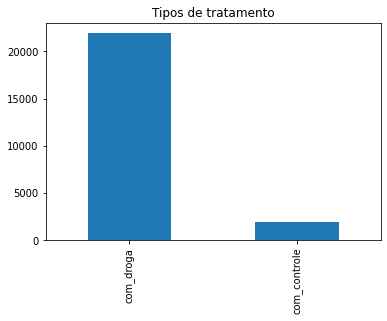

In [ ]:
df['tratamento'].value_counts().plot.bar(title = 'Tipos de tratamento')

Observamos uma quantidade significativamente maior de dados com rótulo 'com_droga'. 

In [ ]:
df['composto'][df.tratamento == 'com_controle'].value_counts()

cacb2b860    1866
Name: composto, dtype: int64

Após o código acima, constatamos que todas as amostras rotuladas 'com_controle' foram estudadas com uma única droga, cacb2b860. Isso explica a discrepância entre a quantidade 'com_droga' e 'com_controle'.  

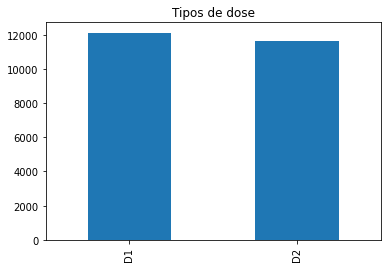

In [ ]:
df['dose'].value_counts().plot.bar(title = 'Tipos de dose')

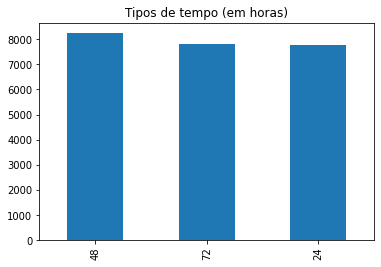

In [ ]:
df['tempo'].value_counts().plot.bar(title = 'Tipos de tempo (em horas)')

Os tipos de dose e os tempos de administração estão bem distribuídos. Os dados estão balanceados.

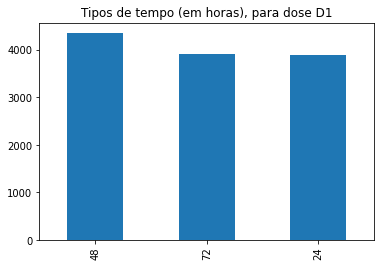

In [ ]:
df[df.dose == 'D1']['tempo'].value_counts().plot.bar(title = 'Tipos de tempo (em horas), para dose D1') 

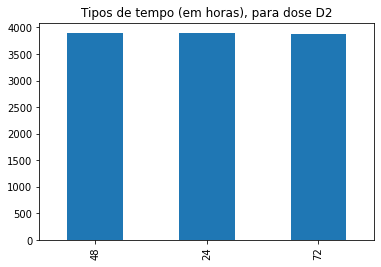

In [ ]:
df[df.dose == 'D2']['tempo'].value_counts().plot.bar(title = 'Tipos de tempo (em horas), para dose D2')

## Analise dos compostos

Faremos agora uma análise descritiva dos compostos. Para isso, começaremos conhecendo quais são os compostos com maior frequência. 

In [ ]:
df['composto'].value_counts()[0:15]

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
d08af5d4b     196
292ab2c28     194
d50f18348     186
d1b47f29d     178
67c879e79      19
52d1e6f43      18
d488d031d      18
83a9ea167      18
6b8b675cc      14
5d9bb0ebe      14
Name: composto, dtype: int64

Observa-se então que apenas 9 compostos tem frequência acima de 100. 

In [ ]:
cod_composto = df['composto'].value_counts().index[0:9]

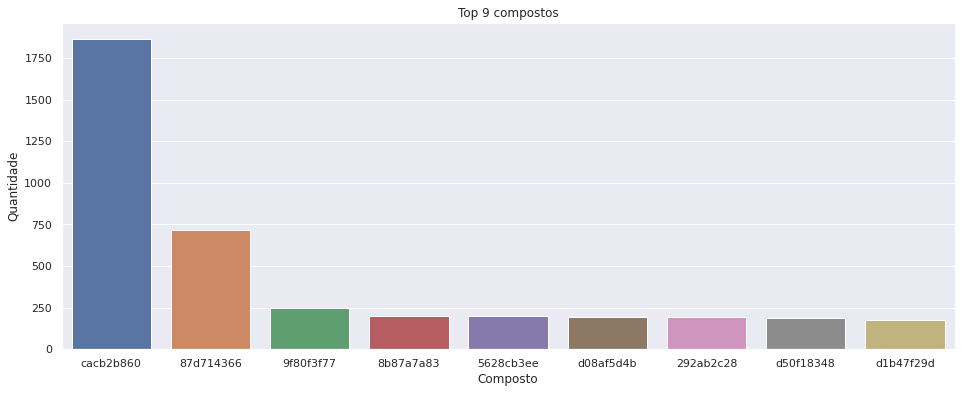

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(16, 6)) #para deixar o gráfico maior e mais legível
sns.set()
ax = sns.countplot(x = 'composto', data = df.query('composto in @cod_composto'), order = df['composto'].value_counts().index[0:9])
ax.set_title('Top 9 compostos')
ax.set(xlabel='Composto', ylabel= 'Quantidade') #muda o nome dos eixos
plt.show()

Observe que há uma grande discrepância na quantidade de compostos. O composto cacb2b860 aparece com uma quantidade muito maior. Este é exatamente o mesmo composto usando no grupo de controle. 

Vejamos agora o histograma das variáveis g0 e g1

Text(0, 0.5, 'Contagem')

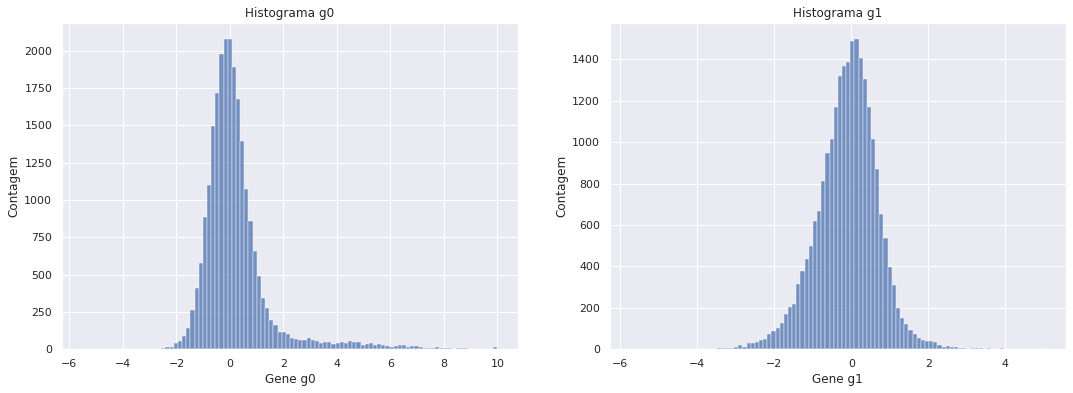

In [ ]:
figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.histplot(data = df['g0'], bins = 100, stat = 'count')
plt.title('Histograma g0')
plt.xlabel('Gene g0')
plt.ylabel('Contagem')

plt.subplot(1, 2, 2)
sns.histplot(data = df['g1'], bins = 100, stat = 'count')
plt.title('Histograma g1')
plt.xlabel('Gene g1')
plt.ylabel('Contagem')

Agora os histogramas comparados com os gráficos boxplot

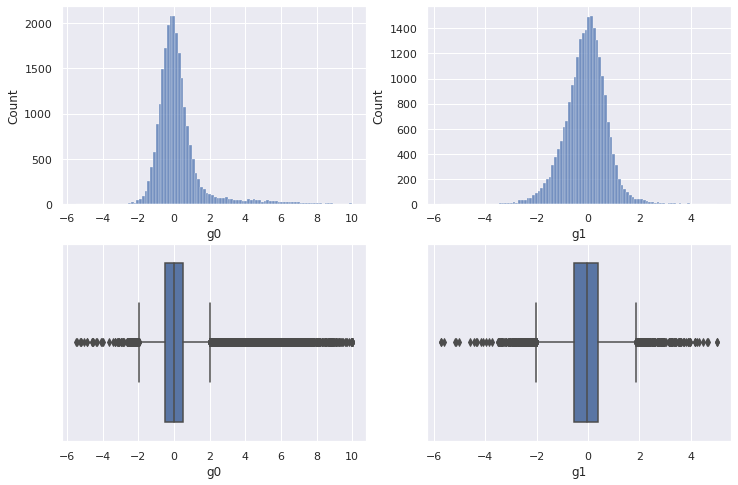

In [ ]:

figure(figsize=(12, 8))

fig = plt.subplot(2, 2, 1)
sns.histplot(data = df['g0'], bins = 100, stat = 'count')

plt.subplot(2, 2, 3)
sns.boxplot(x = 'g0', data = df)

plt.subplot(2, 2, 2)
sns.histplot(data = df['g1'], bins = 100, stat = 'count')

plt.subplot(2, 2, 4)
sns.boxplot(x = 'g1', data = df)


### Boxplots

Aprofundando ainda mais a análise, vamos estudar os boxplot dos genes g0 e g1 comparados com os tipos de tratamento

Text(0.5, 1.0, 'Boxplot do gene g1 comparado com o tipo de tratamento')

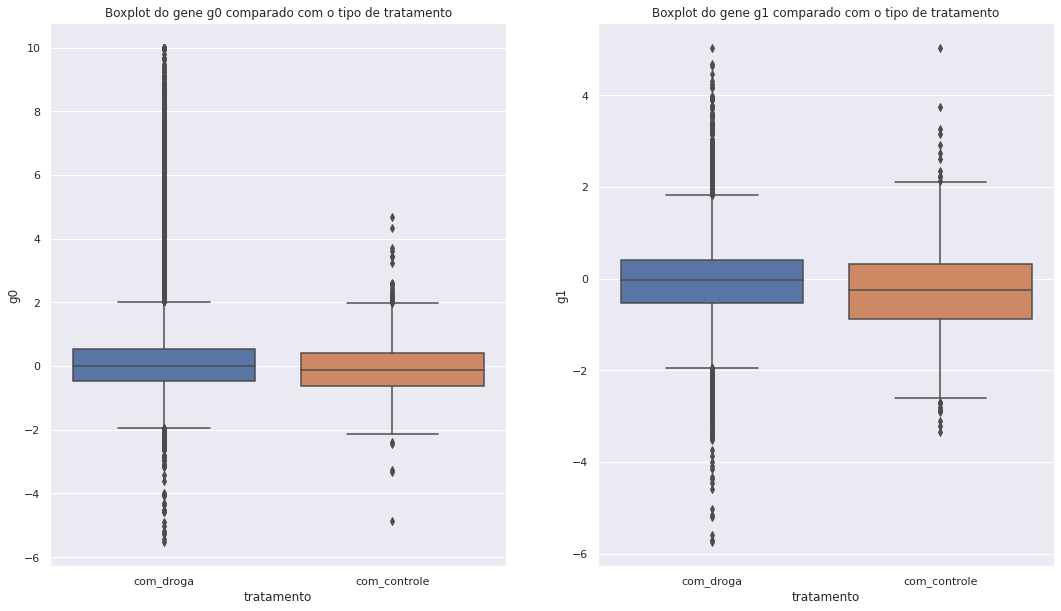

In [ ]:
figure(figsize=(18, 10))

plt.subplot(1, 2, 1)
sns.boxplot(x = 'tratamento', y = 'g0', data = df)
plt.title('Boxplot do gene g0 comparado com o tipo de tratamento')


plt.subplot(1, 2, 2)
sns.boxplot(x = 'tratamento', y = 'g1', data = df)
plt.title('Boxplot do gene g1 comparado com o tipo de tratamento')


Observamos que ambas as variáveis possuem muitos outliers, ou seja, valores muito distantes da mediana. Porém, esses outliers se concentram quando consideramos a categoria 'com_droga'. Isso levanta o questionamento: quais desses compostos estão produzindo mais outliers?
Inicialmente, vejamos como cada um dos 8 compostos mais frequentes afetam o boxplot de g0.

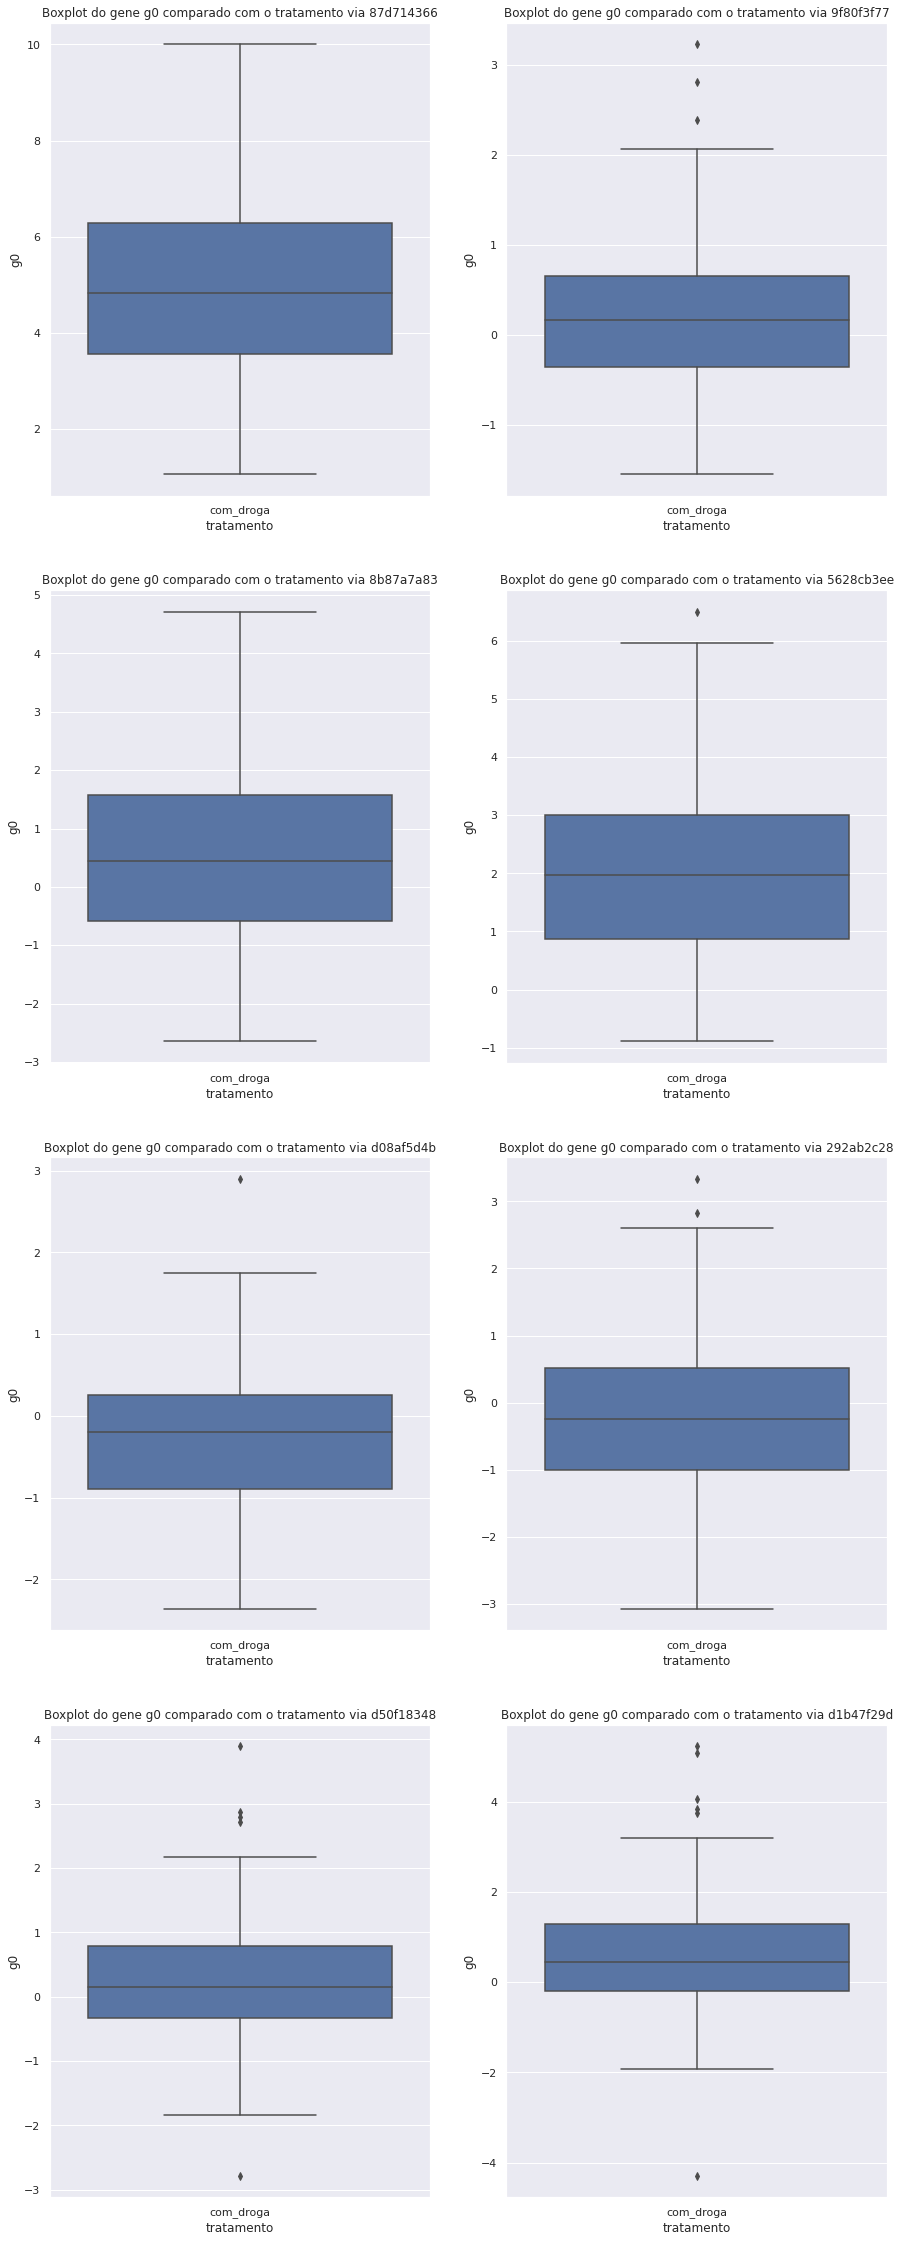

In [ ]:
figure(figsize=(15, 40))


plt.subplot(4, 2, 1)
sns.boxplot(x = 'tratamento', y = 'g0', data = df[df.composto == '87d714366'])
plt.title('Boxplot do gene g0 comparado com o tratamento via 87d714366')


plt.subplot(4, 2, 2)
sns.boxplot(x = 'tratamento', y = 'g0', data = df[df.composto == '9f80f3f77'])
plt.title('Boxplot do gene g0 comparado com o tratamento via 9f80f3f77')

plt.subplot(4, 2, 3)
sns.boxplot(x = 'tratamento', y = 'g0', data = df[df.composto == '8b87a7a83'])
plt.title('Boxplot do gene g0 comparado com o tratamento via 8b87a7a83')

plt.subplot(4, 2, 4)
sns.boxplot(x = 'tratamento', y = 'g0', data = df[df.composto == '5628cb3ee'])
plt.title('Boxplot do gene g0 comparado com o tratamento via 5628cb3ee')

plt.subplot(4, 2, 5)
sns.boxplot(x = 'tratamento', y = 'g0', data = df[df.composto == 'd08af5d4b'])
plt.title('Boxplot do gene g0 comparado com o tratamento via d08af5d4b')

plt.subplot(4, 2, 6)
sns.boxplot(x = 'tratamento', y = 'g0', data = df[df.composto == '292ab2c28'])
plt.title('Boxplot do gene g0 comparado com o tratamento via 292ab2c28')

plt.subplot(4, 2, 7)
sns.boxplot(x = 'tratamento', y = 'g0', data = df[df.composto == 'd50f18348'])
plt.title('Boxplot do gene g0 comparado com o tratamento via d50f18348')

plt.subplot(4, 2, 8)
sns.boxplot(x = 'tratamento', y = 'g0', data = df[df.composto == 'd1b47f29d'])
plt.title('Boxplot do gene g0 comparado com o tratamento via d1b47f29d')

plt.show()

Observamos então que há poucos outliers vindo de tratamento com os 9 compostos mais frenquentes. Portanto, esses outliers devem vir de tratamento com compostos menos frequentes. Vejamos isso em outro bloxpot

Text(0.5, 1.0, 'gene g0 x tratamento com os compostos mais frequentes')

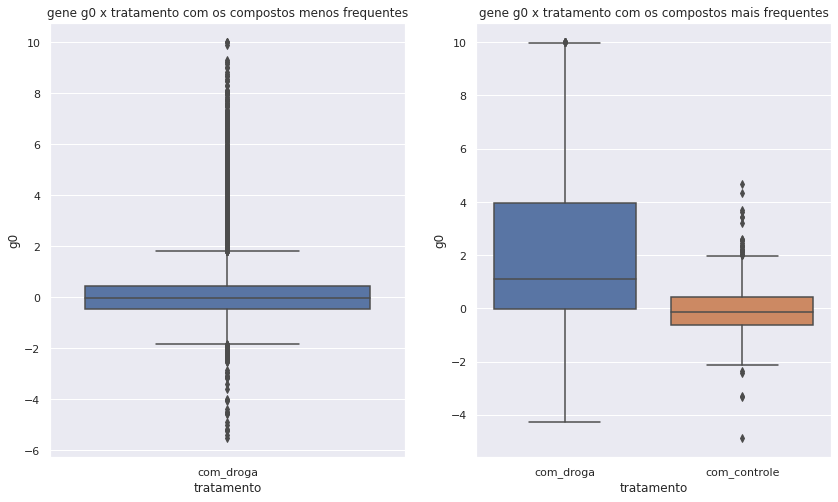

In [ ]:
figure(figsize=(14,8))

plt.subplot(1,2,1)
sns.boxplot(x = 'tratamento', y = 'g0', data = df.query('composto not in @cod_composto'))
plt.title('gene g0 x tratamento com os compostos menos frequentes')

plt.subplot(1,2,2)
sns.boxplot(x = 'tratamento', y = 'g0', data = df.query('composto in @cod_composto'))
plt.title('gene g0 x tratamento com os compostos mais frequentes')


**Conclusão**: com respeito ao gene g0, as drogas mais frequentes apresentam poucos outliers, já as drogas menos frequentes apresentam uma grande quantidade de outliers. 

Text(0.5, 1.0, 'gene g1 x tratamento com os compostos mais frequentes')

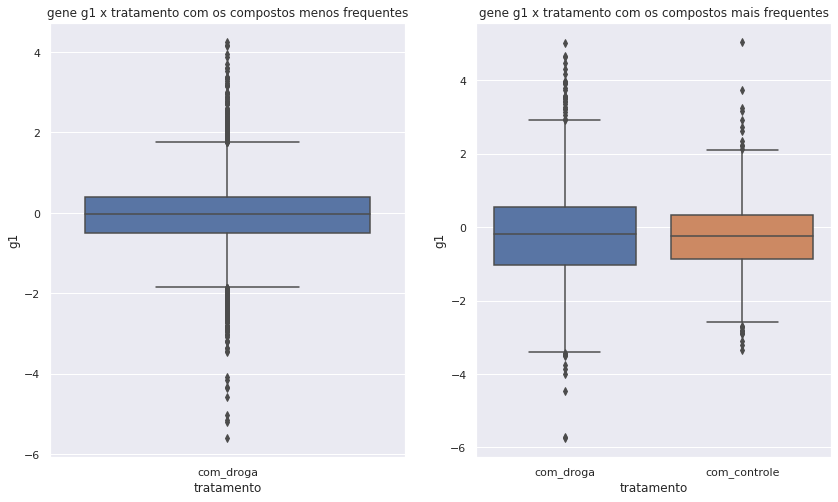

In [ ]:
figure(figsize=(14,8))

plt.subplot(1,2,1)
sns.boxplot(x = 'tratamento', y = 'g1', data = df.query('composto not in @cod_composto'))
plt.title('gene g1 x tratamento com os compostos menos frequentes')

plt.subplot(1,2,2)
sns.boxplot(x = 'tratamento', y = 'g1', data = df.query('composto in @cod_composto'))
plt.title('gene g1 x tratamento com os compostos mais frequentes')


Observamos que algo semelhante não ocorre com o gene g1, por exemplo. 

### Tabelas de frequência


Podemos extrair boas informações de tabelas de frequencias.

In [ ]:
pd.crosstab([df['dose'], df['tempo']], df['tratamento']) #sem normalizacão

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

De cara já percebemos que as doses pararem manter as mesmas proporções entre o grupo de controle e o grupo de estudos. Podemos ser mais precisos, ao normalizar a tabela pelas linhas. 

In [ ]:
pd.crosstab([df['dose'], df['tempo']], df['tratamento'], normalize='index') #normalizado pela linha

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

Agora está bem claro o quão próximos estão os valores das proporções. 
Se quisermos, podemos também normalizar pelas colunas.

In [ ]:
pd.crosstab([df['dose'], df['tempo']], df['tratamento'], normalize='columns')  #normalizado pela coluna

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

Ao normalizar pelas colunas, observamos que os seis tipos de tratamento (2 tipos de doses x 3 tipos de tempos) são igualmente distribuídos, tanto no grupo de controle quanto no grupo de estudos. 

Podemos refinar ainda mais o uso da tabela de frequencia, ao incuir outras informações. Por exemplo, podemos estar interessando em saber a média da variação gênica g0 para cada uma das seis possibilidades de tratamento, como mostra a próxima tabela.

In [ ]:
#Mostra o valor média do gene g0 para cada uma das linhas da tabela de frequencia
pd.crosstab([df['dose'], df['tempo']], df['tratamento'], values=df['g0'], aggfunc=  'mean') 

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

Ou podemos estar interessados no valor máximo da variação gênica g0:

In [ ]:
#Mostra o valor máximo do gene g0 para cada uma das linhas da tabela de frequencia
pd.crosstab([df['dose'], df['tempo']], df['tratamento'], values=df['g0'], aggfunc=  'max') 

tratamento  com_controle  com_droga
dose tempo                         
D1   24            3.226      9.908
     48            3.423     10.000
     72            2.584      9.355
D2   24            2.601      7.167
     48            4.335     10.000
     72            4.670     10.000

O comando crosstab() não é o único que pode ser utilizado para cirar tabelas de frequencias. Vejamos outros métodos.

In [ ]:
#Tabela de frequência usando o groupby
tabela = df.groupby(by=['dose','tempo'])['tratamento'].value_counts()
tabela.unstack()

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [ ]:
#Uma outra possibilidade com groupby seria
tab = pd.DataFrame(df.groupby(by = ['dose', 'tempo'])['tratamento'].value_counts())
tab

tratamento
dose tempo tratamento              
D1   24    com_droga           3585
           com_controle         301
     48    com_droga           4011
           com_controle         343
     72    com_droga           3600
           com_controle         307
D2   24    com_droga           3581
           com_controle         305
     48    com_droga           3591
           com_controle         305
     72    com_droga           3580
           com_controle         305

Também é possível obter resultados semelhantes usando o melt(). 

In [ ]:
#Uma possibilidade seria
tab1 = pd.melt(frame= df, id_vars= ['tratamento', 'dose'], value_vars= ['tempo']).value_counts()
tab1.unstack()

value                         24    48    72
tratamento   dose variable                  
com_controle D1   tempo      301   343   307
             D2   tempo      305   305   305
com_droga    D1   tempo     3585  4011  3600
             D2   tempo     3581  3591  3580

In [ ]:
#Outra maneira de fazer seria
tab1 = pd.DataFrame(pd.melt(frame= df, id_vars= ['tratamento', 'dose'], value_vars= ['tempo']).value_counts())
tab1

0
tratamento   dose variable value      
com_droga    D1   tempo    48     4011
                           72     3600
             D2   tempo    48     3591
             D1   tempo    24     3585
             D2   tempo    24     3581
                           72     3580
com_controle D1   tempo    48      343
                           72      307
             D2   tempo    72      305
                           48      305
                           24      305
             D1   tempo    24      301

Note que usando esse último código, o valores são passados de forma descrecente, deixando a organização dos rótulo um pouco bagunçada. 

### Dispersão e correlação

Vejamos agora a dispersão e a correlação entre as variáveis.

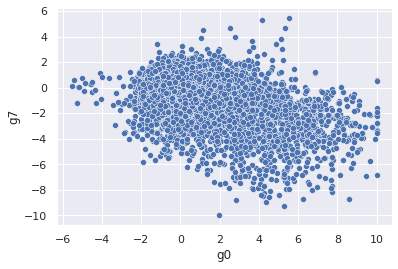

In [ ]:
#Gráfico de dispersão entre g0  e g7
sns.scatterplot(x = 'g0', y = 'g7', data= df)

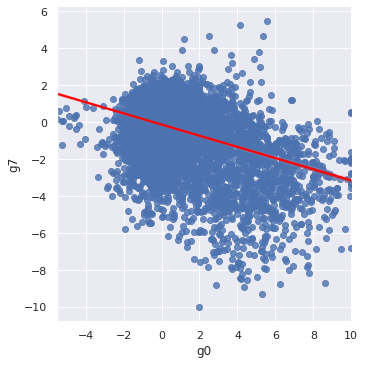

In [ ]:
#linha de tendência
sns.lmplot(x = 'g0', y = 'g7', data= df, line_kws={'color':'red'})

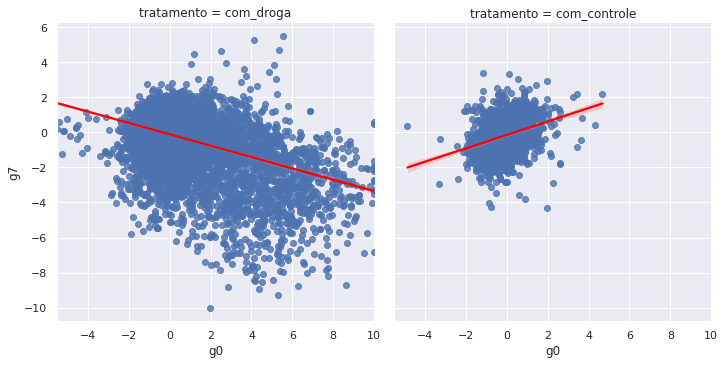

In [ ]:
#linha de tendência, separando por tipos de tratamentos
sns.lmplot(x = 'g0', y = 'g7', data= df, line_kws={'color':'red'}, col = 'tratamento')

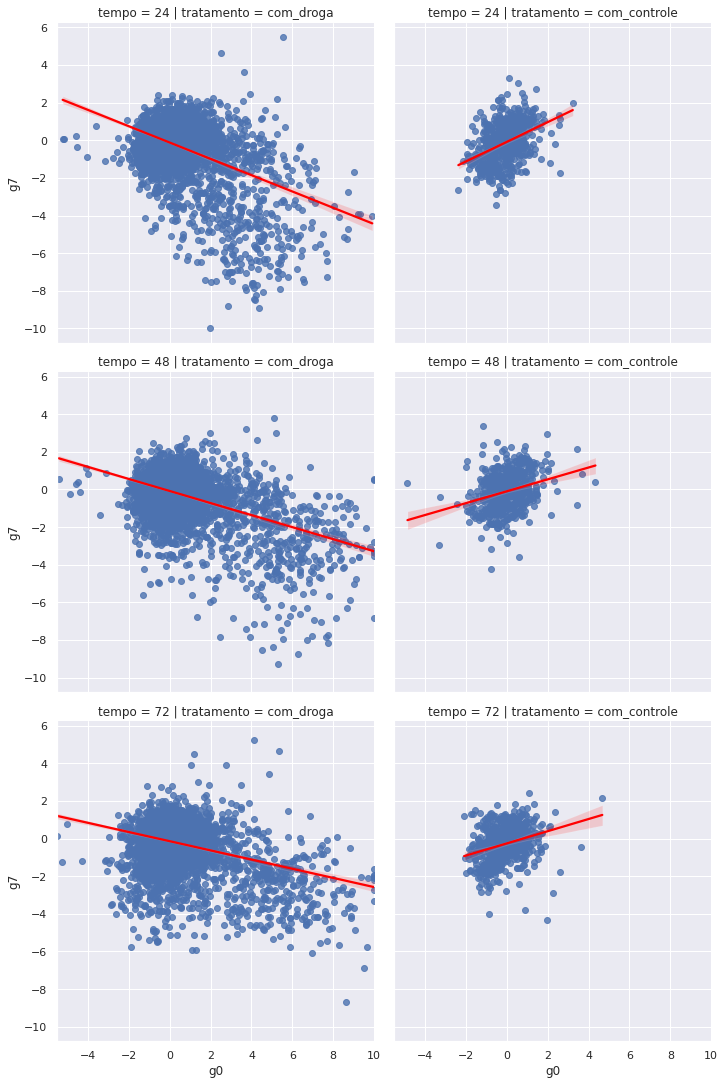

In [ ]:
#linha de tendência, separando os tratamentos e os tempos
sns.lmplot(x = 'g0', y = 'g7', data= df, line_kws={'color':'red'}, col = 'tratamento', row = 'tempo')

In [ ]:
#Correlação entre os genes
df.loc[:,'g0':'g771'].corr()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,...,g732,g733,g734,g735,g736,g737,g738,g739,g740,g741,g742,g743,g744,g745,g746,g747,g748,g749,g750,g751,g752,g753,g754,g755,g756,g757,g758,g759,g760,g761,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
g0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,...,0.365095,-0.528006,0.295970,0.067108,-0.250243,-0.110665,-0.214344,-0.280492,-0.036098,-0.128288,-0.498922,-0.469595,0.673664,0.538050,0.297528,0.066530,0.240252,-0.170949,0.485924,-0.093815,0.397476,0.017923,0.321260,-0.131709,-0.133430,0.178220,0.201902,-0.205648,-0.676835,-0.433554,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,...,-0.015556,-0.017184,0.043104,-0.189662,-0.050194,-0.007878,-0.083539,-0.042175,0.014307,-0.134166,-0.026985,0.088382,-0.077453,0.015545,-0.027527,-0.071078,-0.095445,0.049612,-0.040518,-0.074277,-0.022356,0.125763,-0.082779,0.020292,-0.023171,-0.207192,-0.066570,-0.057007,0.002062,0.029795,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,...,0.089525,-0.140916,0.008587,0.042106,-0.018846,-0.008093,-0.074404,-0.080120,-0.020085,-0.028099,-0.098775,-0.113000,0.175916,0.119166,0.071051,0.025358,0.078971,-0.086326,0.149456,0.033432,0.124239,-0.006327,0.120148,-0.041162,-0.030040,0.048549,0.096369,0.000494,-0.172627,-0.130200,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,...,0.039519,0.000851,0.011655,-0.116724,0.304819,-0.087159,-0.134135,-0.031211,0.174116,0.060289,-0.119276,-0.140391,0.110547,0.145925,0.155011,0.049182,-0.007754,-0.128488,0.078139,0.012422,0.040728,0.164467,0.171886,-0.069777,0.066560,0.102111,-0.036922,0.111994,-0.133740,-0.226928,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,...,0.215930,-0.292602,-0.008241,-0.005070,-0.284391,-0.116918,-0.252399,-0.250280,0.000141,-0.172896,-0.324769,-0.291644,0.302912,0.222951,0.144028,-0.020950,0.129354,-

Vamos agora criar um mapa de calor (heatmap) para visualizar nossas correlações de forma mais gráfica. 

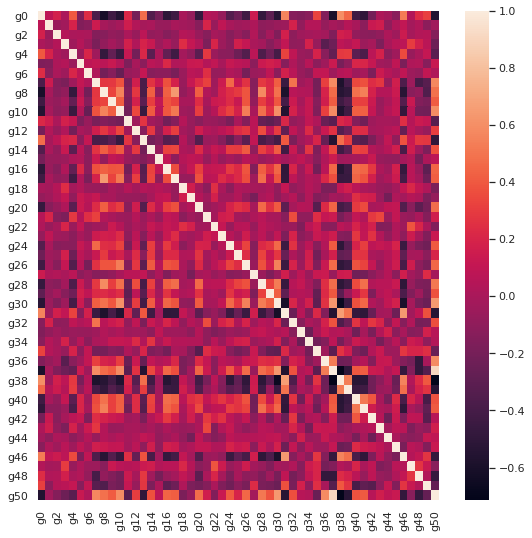

In [ ]:
#Uma possível maneira de fazer é assim:
figure(figsize= (9,9))
sns.heatmap(data= df.loc[:,'g0':'g50'].corr())

Podemos fazer algo um pouco mais elaborado e elegante, como visto na aula:


In [ ]:
corr = df.loc[:,'g0':'g50'].corr() #cria uma variável que vai armazenar a tabela com as correlações

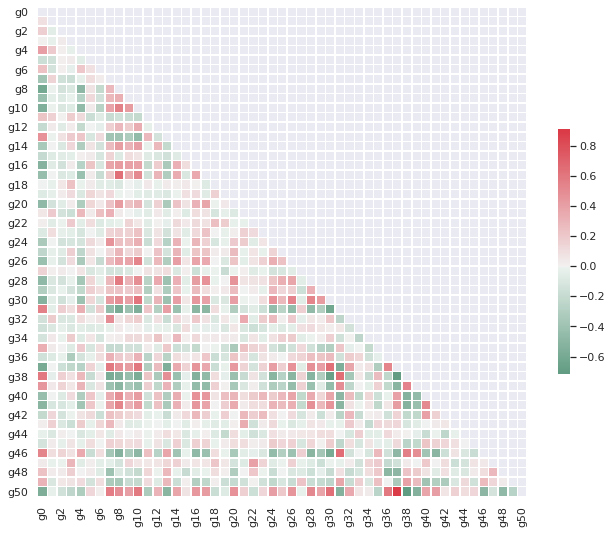

In [ ]:
mascara = np.triu(np.ones_like(corr, dtype=bool))
#numpy.triu() retorna uma cópia do array de entrada, com os elementos abaixo da diagonal principal zerados
#numpy_ones_like() retorna uma array contendo apenas 1's, do mesmo tamanho que o array de entrada

f, ax = plt.subplots(figsize=(11, 9))
#cria um ambiente para plotar várias figuras, em um espaço 11 por 9

cmap = sns.diverging_palette(150, 10, as_cmap=True)
#cria uma paleta de cores em degradê

sns.heatmap(corr, mask=mascara, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#cria um mapa de calor com base na tabela de correlações, com a paleta de cores escolhida e utilziando a máscara definida acima.
#Observe que a máscara tem zeros acima da diagonal superior, e o tipo foi definido como boleano. Logo acima da diagonal temos False.
#Ou seja, acima da diagonal a figura (o mapa de calor) será apagado. 

Vamos agora calcular a correlação entre as expressões gênicas gx e as viabilidades celuares cx.
Não será tão direto. Vamos criar essa tabela em um data frame separado.

In [ ]:
tb_corr = pd.DataFrame()
tb_corr['gene'] = df.columns[5:777]
tb_corr
#cria o data frame que vai armazenar as correlações e cria a primeira coluna, com as variações gênicas

,gene
0,g0
1,g1
2,g2
3,g3
4,g4
...,...
767,g767
768,g768
769,g769
770,g770


In [ ]:
a = 0 #índice para contar as iterações
for c in df.columns[777:]: #faremos um loop pelas colunas das variações gênicas
  lista_corr = []          #cria uma lista vazia, onde iremos armazenar os valores das correlações, na próxima instância do loop
  for g in df.columns[5:777]: #ainda dentro do primeiro loop, faremos um segundo, percorrendo as colunas dos genes
      lista_corr.append(df[g].corr(df[c])) #calcula a correlação de g com c e armazena na lista. A lista contém as correlações de c com todos os g.
  col_name = 'correlação do gene com c' + str(a) #define o nome da coluna. O índice de iteração será útil aqui
  a = a+1                                  #contamos a iteração
  tb_corr[col_name] = lista_corr  #cria uma coluna no data frame com as correlações de c
  #esse código vai demorar alguns segundo para rodar

In [ ]:
#pro fim, o data frame com as correlações
tb_corr

,gene,correlação do gene com c0,correlação do gene com c1,correlação do gene com c2,correlação do gene com c3,correlação do gene com c4,correlação do gene com c5,correlação do gene com c6,correlação do gene com c7,correlação do gene com c8,correlação do gene com c9,correlação do gene com c10,correlação do gene com c11,correlação do gene com c12,correlação do gene com c13,correlação do gene com c14,correlação do gene com c15,correlação do gene com c16,correlação do gene com c17,correlação do gene com c18,correlação do gene com c19,correlação do gene com c20,correlação do gene com c21,correlação do gene com c22,correlação do gene com c23,correlação do gene com c24,correlação do gene com c25,correlação do gene com c26,correlação do gene com c27,correlação do gene com c28,correlação do gene com c29,correlação do gene com c30,correlação do gene com c31,correlação do gene com c32,correlação do gene com c33,correlação do gene com c34,correlação do gene com c35,correlação do gene com c36,correlação do gene com c37,correlação do gene com c38,...,correlação do gene com c60,correlação do gene com c61,correlação do gene com c62,correlação do gene com c63,correlação do gene com c64,correlação do gene com c65,correlação do gene com c66,correlação do gene com c67,correlação do gene com c68,correlação do gene com c69,correlação do gene com c70,correlação do gene com c71,correlação do gene com c72,correlação do gene com c73,correlação do gene com c74,correlação do gene com c75,correlação do gene com c76,correlação do gene com c77,correlação do gene com c78,correlação do gene com c79,correlação do gene com c80,correlação do gene com c81,correlação do gene com c82,correlação do gene com c83,correlação do gene com c84,correlação do gene com c85,correlação do gene com c86,correlação do gene com c87,correlação do gene com c88,correlação do gene com c89,correlação do gene com c90,correlação do gene com c91,correlação do gene com c92,correlação do gene com c93,correlação do gene com c94,correlação do gene com c95,correlação do gene com c96,correlação do gene com c97,correlação do gene com c98,correlação do gene com c99
0,g0,-0.624116,-0.624810,-0.639789,-0.604041,-0.606231,-0.629189,-0.669697,-0.608954,-0.642211,-0.630989,-0.626020,-0.631486,-0.629841,-0.643529,-0.622502,-0.647751,-0.638829,-0.678957,-0.594877,-0.643239,-0.684132,-0.630950,-0.543857,-0.579103,-0.660192,-0.605740,-0.620731,-0.661781,-0.647510,-0.615229,-0.653816,-0.659935,-0.646008,-0.656088,-0.649368,-0.639943,-0.606850,-0.565831,-0.627974,...,-0.662186,-0.639153,-0.665249,-0.604982,-0.621192,-0.646914,-0.630096,-0.625521,-0.643556,-0.622139,-0.655613,-0.637361,-0.669361,-0.666255,-0.541994,-0.660842,-0.540702,-0.647280,-0.670072,-0.592806,-0.644508,-0.577032,-0.621314,-0.673295,-0.588529,-0.660818,-0.625025,-0.625130,-0.627185,-0.682893,-0.648726,-0.629025,-0.633479,-0.668520,-0.656116,-0.600758,-0.646784,-0.622840,-0.640484,-0.609238
1,g1,-0.037405,-0.030558,-0.039616,0.011899,-0.027014,-0.004664,-0.027941,-0.003155,-0.016199,0.012004,-0.011896,-0.028692,-0.016804,-0.039030,-0.018724,0.001283,-0.020506,-0.028191,-0.006079,-0.004661,-0.009059,-0.013806,0.052851,0.019902,-0.015551,0.020494,-0.021502,-0.023190,-0.026067,-0.016824,-0.008202,-0.035886,-0.020831,-0.016770,0.006563,-0.005731,-0.032461,-0.037041,-0.027810,...,-0.040883,-0.027389,-0.013518,-0.005513,0.004970,0.000605,0.005983,-0.025452,-0.014658,-0.016301,-0.035473,0.004021,-0.041172,-0.023066,0.004179,-0.020136,0.023721,-0.003363,-0.044079,0.006385,-0.004805,-0.010185,0.002633,-0.022321,-0.018388,-0.020843,-0.016555,0.011173,-0.037424,-0.008322,-0.034557,-0.000934,-0.022478,-0.034891,-0.042638,-0.011237,-0.022127,-0.008487,-0.002824,-0.002308
2,g2,-0.168656,-0.178692,-0.176733,-0.156894,-0.180127,-0.170701,-0.181008,-0.175473,-0.178634,-0.163261,-0.180958,-0.176356,-0.180042,-0.183370,-0.174772,-0.180545,-0.162327,-0.177785,-0.169176,-0.170238,-0.182883,-0.172854,-0.137744,-0.193688,-0.170649,-0.171545,-0.179031,-0.184632,

Apesar de pouco usual, com as correlações organizadas em um data frame dessa forma, podemos rapidamente responder algumas perguntas que possamos ter. 
Por exemplo: qual gene tem maior correlação com c0?

In [ ]:
print('O gene com maior correlação com c0 é', tb_corr[tb_corr['correlação do gene com c0'] == tb_corr['correlação do gene com c0'].max()].iloc[0,0])
print('O valor da correlação é', tb_corr['correlação do gene com c0'].max())

O gene com maior correlação com c0 é g760
O valor da correlação é 0.7739822187115111


# Novos dados: resultados dos experimentos

## Preparação e análise inicial

Vamos agora inserir uma nova base de dados, que contém os resultados dos estudos realizados. Começamos importando os dados:

In [ ]:
df_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')
df_resultados

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23810,id_fffb70c0c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23811,id_fffc1c3f4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23812,id_fffcb9e7c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Nessa nova base de dados, vemos a ação de cada composto comparado com cada mecanismo de ação da droga: 1 para quando o mecanismo é ativado, 0 para quando não é ativado. 
Façamos uma contagem para saber quantas vezes cada mecanismo de ação (moa) foi ativado:

In [ ]:
contagem = df_resultados.drop('id', axis=1).sum().sort_values(ascending=False)
contagem

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

Assim, observamos que os MOAs nfkb_inhibitor, proteasome_inhibitor e cyclooxygenase_inhibitor foram os três mais ativados. Os três são mecanismos do tipo inibidor. 

In [ ]:
df_resultados.drop('id', axis=1).sum(axis = 1)

0        1
1        0
2        3
3        0
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    0
Length: 23814, dtype: int64

Vamos encontrar as top 10 moa que mais aparecem no estudo.

In [ ]:
from collections import Counter
suf = []
contador = []
suf_moa = pd.DataFrame()
for nome in df_resultados.columns[1:]:
  suf.append(nome.split('_')[-1])

pd.DataFrame(Counter(suf), index = [0]).iloc[:,0:10]
top10_moa = pd.DataFrame()
top10_moa['Ação'] = pd.DataFrame(Counter(suf), index = [0]).iloc[:,0:10].columns
top10_moa['Total de ocorrências'] = pd.DataFrame(Counter(suf), index = [0]).iloc[:,0:10].T.values
top10_moa

,Ação,Total de ocorrências
0,inhibitor,112
1,agonist,28
2,antagonist,32
3,activator,5
4,analgesic,1
5,local,1
6,anti-inflammatory,1
7,antiarrhythmic,1
8,antibiotic,1
9,anticonvulsant,1


Constatamos que de fato o moa inibidor teve maior ocorrência, seguido de agonista e antagonista. 

Podemos refinar o questionamento: quantas vezes cada moa foi ativado por algum composto?

In [ ]:
lista_acoes = []
lista_ativacoes = []
for nome in df_resultados.columns[1:]:
  acao = nome.split('_')[-1] 
  total_ativacoes = df_resultados[nome].sum()
  lista_acoes.append(acao)
  lista_ativacoes.append(total_ativacoes)

tab_acoes_parcial = pd.DataFrame()
tab_acoes_parcial['Acão do composto'] = lista_acoes
tab_acoes_parcial['Total de ativações'] = lista_ativacoes
tab_acoes_parcial

,Acão do composto,Total de ativações
0,inhibitor,17
1,inhibitor,18
2,inhibitor,24
3,agonist,190
4,antagonist,301
...,...,...
201,inhibitor,6
202,inhibitor,170
203,b,26
204,agonist,39


In [ ]:
top10_acoes = tab_acoes_parcial.groupby(by = 'Acão do composto').sum().sort_values(by = 'Total de ativações', ascending = False)[0:10]
top10_acoes.reset_index(level=0, inplace=True)
top10_acoes

,Acão do composto,Total de ativações
0,inhibitor,9693
1,antagonist,3449
2,agonist,2330
3,blocker,323
4,agent,150
5,activator,115
6,local,80
7,antioxidant,73
8,anti-inflammatory,73
9,immunosuppressant,73


Assim, observamos que de fato o moa inibidor não apenas é o mais frequente como o que foi mais ativado nos estudos, seguido de agonista e antagonista. 
Curioso que a ação bloqueador (blocker) aparece apenas uma vez, mas foi ativada 323 vezes, figurando em quarto lugar no ranking de MOAs mais ativados. O mesmo comentário se aplica aos moa 'agent', 'local', 'antioxidant', 'anti-inflammatory' e 'immunosuppressant'. 

Vejamos essas informações em um gráfico de barras

<BarContainer object of 10 artists>

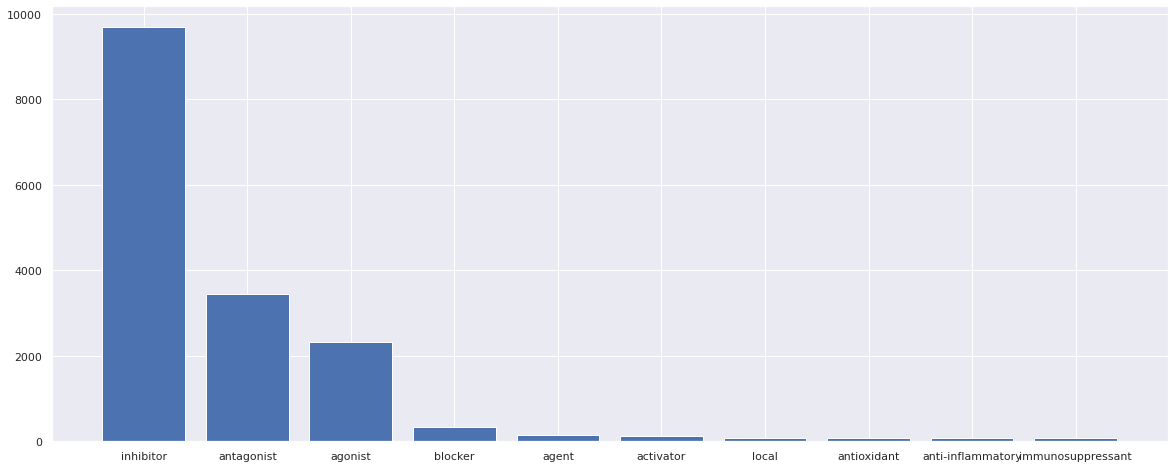

In [ ]:
from matplotlib.pyplot import figure
figure(figsize = (20,8))
plt.bar(data = top10_acoes, x = 'Acão do composto', height = top10_acoes['Total de ativações'])

## Merge com os dados iniciais

Vamos agora criar uma nova coluna que conterá a informação: quantos moa foram ativados por cada composto.

In [ ]:
df_resultados['n_moa'] = df_resultados.drop('id', axis=1).sum(axis=1)

Podemos também nos perguntar se o composto ativou ou não um moa. 

In [ ]:
df_resultados['ativo_moa'] = (df_resultados['n_moa'] != 0)*1
df_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


Queremos agora dar um passo adiante e comparar os dados das nossas duas tabelas. Para isso, precisamos criar uma tabela total, com informações de ambas, usando o comando merge().

In [ ]:
df_total = pd.merge(df, df_resultados[['id','n_moa', 'ativo_moa']], on='id')
df_total.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,1
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,0
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,1
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,0
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,1


In [ ]:
df_total.query('tratamento == "com_controle"' )['ativo_moa'].value_counts()

0    1866
Name: ativo_moa, dtype: int64

Com esse comando vemos que nenhum moa foi ativado pelo composto do grupo de controle, o que é exatamente o que esperamos.

In [ ]:
df_total.query('tratamento == "com_droga"' )['ativo_moa'].value_counts()

1    14447
0     7501
Name: ativo_moa, dtype: int64

Vemos aqui que alguns compostos (7501 para sermos mais precisos) não ativaram nenhum moa.

Vamos agora criar a coluna 'Eh_controle' que vai retornar 1 se tratamento = com_controle e 0 caso contrário. 
E também colunas que nos digam se o tempo do tratamento foi ou não de 24, 48 e 72 horas.

In [ ]:
df_total['Eh controle'] = (df_total['tratamento'] == 'com_controle')*1
df_total['Tempo eh 24'] = (df_total['tempo'] == 24)*1
df_total['Tempo eh 48'] = (df_total['tempo'] == 48)*1
df_total['Tempo eh 72'] = (df_total['tempo'] == 72)*1

In [ ]:
df_total

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa,Eh controle,Tempo eh 24,Tempo eh 48,Tempo eh 72
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,1,0,1,0,0
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,0,0,0,0,1
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,1,0,0,1,0
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,0,0,0,1,0
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.62

## Boxplots

Vejamos alguns boxplots da ação compostos mais frequentes na variância gênica g0.

In [ ]:
composto_principal = df_total['composto'].value_counts()[0:10]
composto_principal

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
d08af5d4b     196
292ab2c28     194
d50f18348     186
d1b47f29d     178
67c879e79      19
Name: composto, dtype: int64

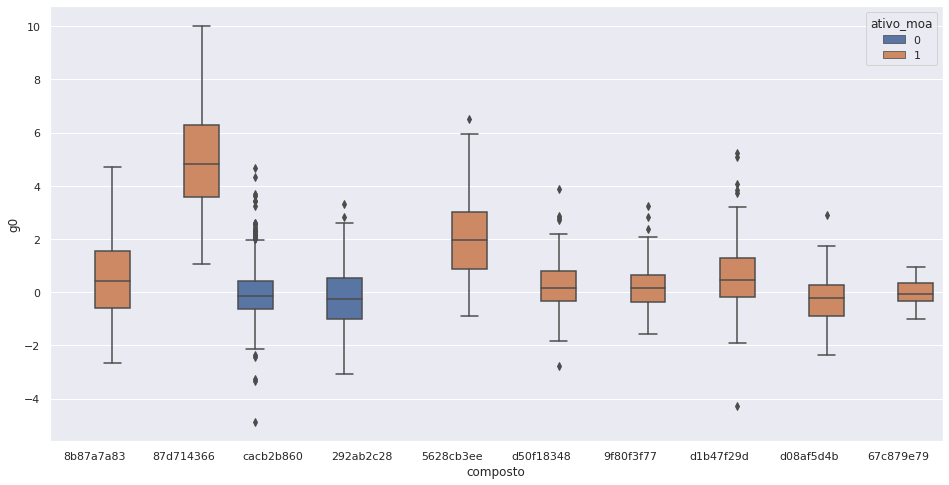

In [ ]:
composto_principal = df_total['composto'].value_counts().index[:10]
plt.figure(figsize=(16,8))
sns.boxplot(data = df_total.query('composto in @composto_principal'), y= 'g0', x='composto', hue='ativo_moa')

Vemos que o composto cacb2b860 não ativou nenhum moa, mas isso já foi observado, já que ele é o composto do grupo de controle. Porém, outro composto dentre os mais frequentes também não ativou nehuum moa, a saber, 292ab2c28. E ambos tem distribuição semelhante. 

Vejamos outros boxplots, por tempo e por dose.

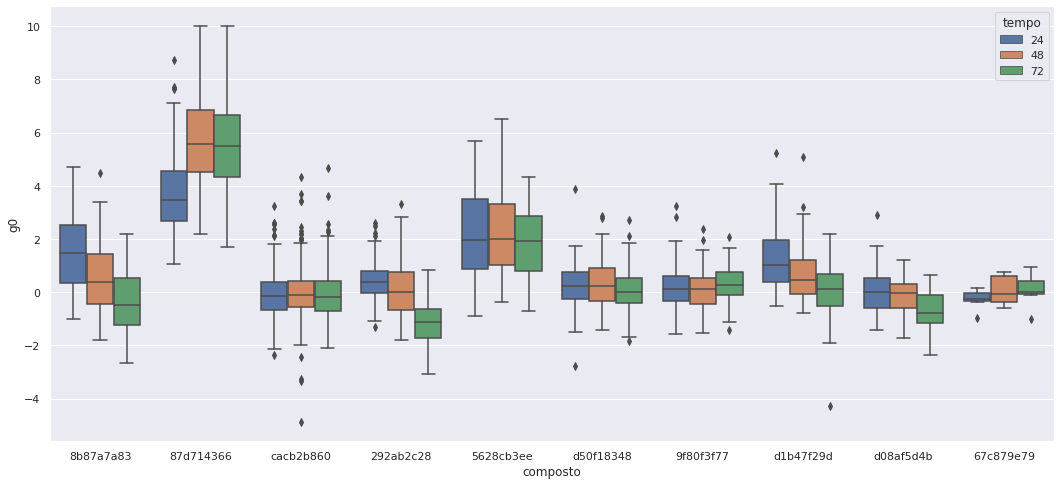

In [ ]:
plt.figure(figsize=(18,8))
sns.boxplot(data = df_total.query('composto in @composto_principal'), y= 'g0', x='composto', hue='tempo')

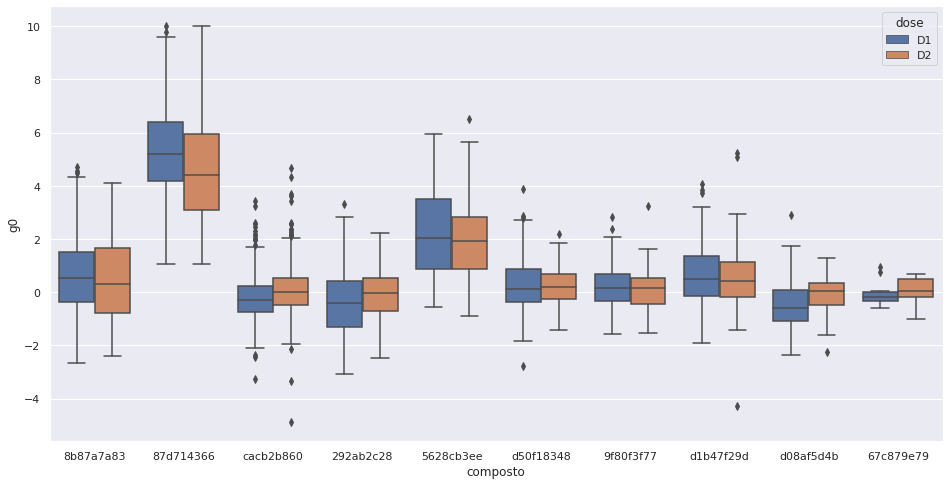

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(data = df_total.query('composto in @composto_principal'), y= 'g0', x='composto', hue='dose')

## Ativação de MOAs

Nosso objetivo agora é verificar se existem compostos que ativaram diferentes MOAs em diferentes cenários do experimentos (diferentes tempos e doses). 
Para isso, vamos construir uma tabela que terá na primeira colunas os compostos e na segunda colunas os moa que foram ativados por esses compostos durante o experimento. 

Antes disso, porém, vamos criar uma função auxiliar, que transforma uma lista de strings em uma única string, pois iremos precisar de um método que faça esse processo.

In [ ]:
def listToString(s): 
    
    
    str1 = "" 
    
     
    for ele in s: 
        str1 += ele  
    
      
    return str1 

Também iremos precisar de um novo data frame, que contenha ao mesmo tempo a coluna 'composto' e as colunas dos MOAs. Então faremos um novo merge

In [ ]:
df_unido = pd.merge(df[['id', 'composto']], df_resultados.drop(['n_moa', 'ativo_moa'], axis=1), on='id')
df_unido

,id,composto,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,b68db1d53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,df89a8e5a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,18bb41b2c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,8c7f86626,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,7cbed3131,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,df1d0a5a1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23810,id_fffb70c0c,ecf3b6b74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23811,id_fffc1c3f4,cacb2b860,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23812,id_fffcb9e7c,8b87a7a83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Agora sim estamos prontos para criar nossa tabela. O código abaixo infelizmente não é o mais rápido (vai levar em torno de 25 min para executar), mas foi o que eu consegui pensar. 

In [ ]:
tab_moe_ativados = pd.DataFrame()
tab_moe_ativados['composto'] = df_unido['composto']
tab_moe_ativados['moe ativados'] = df_unido['composto']
for i in range(0, df_unido.shape[0]):
  lista_aux = []
  for col in df_unido.columns[2:]:
    if df_unido.iloc[i][col] == 1:
      lista_aux.append(col + ', ')
    if len(lista_aux) >0:
      tab_moe_ativados.at[i,'moe ativados'] = listToString(lista_aux)[:-2]
    else:
      tab_moe_ativados.at[i,'moe ativados'] = 'Ativou nenhum'
      

tab_moe_ativados  

,composto,moe ativados
0,b68db1d53,gsk_inhibitor
1,df89a8e5a,Ativou nenhum
2,18bb41b2c,"bcr-abl_inhibitor, kit_inhibitor, pdgfr_inhibitor"
3,8c7f86626,Ativou nenhum
4,7cbed3131,calcium_channel_blocker
...,...,...
23809,df1d0a5a1,serotonin_receptor_antagonist
23810,ecf3b6b74,ppar_receptor_agonist
23811,cacb2b860,Ativou nenhum
23812,8b87a7a83,cdk_inhibitor


Temos agora nossa tabela, mas note que ainda precisamos agrupar pelo composto e verificar se não existe algum composto que para um experimento ativou um grupo de MOAs e para um outro experimento ativou um outro grupo de MOAs. 
O próximo código conta, para cada composto, quantos grupos de MOA ele ativa e calcula o máximo dessas quantidades.

In [ ]:
lista_unicos = []
for comp in tab_moe_ativados['composto'].unique():
  lista_unicos.append(len(tab_moe_ativados[tab_moe_ativados['composto'] == comp]['moe ativados'].unique()))
max(lista_unicos)

1

Observamos então que o máximo é 1, portanto nenhum dos composots ativa mais de um grupo de MOAs para experimentos distintos. 

# Máquinas preditivas

Vamos agora finalmente usar técnicas de machine learning para criar modelos preditivos. Começamos importando as bibliotecas necessárias.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Prevendo se o composto ativa algum MOA

Agora, devemos separar, dentre as colunas do nosso data frame, aquelas que servirão para alimentar as máquinas preditivas e aquela que será a informação a ser prevista. 
Nesse primeiro momento, como variável a ser prevista, utilizaremos y = ativo_moa, isto é, vamos prever se o composto irá ou não ativar algum moa. 
Como parâmetros na variável x, iremos passar dados de dose, tempo, as expressões gênicas e as viabilidades celuares. 

Importante lembrar que já observamos que as viabilidades celuares são variáveis com alta correção entre si. Talvez seja então interessante não considerar todas elas no modelo preditivo. Como já vimos na Aula 5 que as máquinas construídas lá não obtivaram um score muito bom e foram utilizadas todas as viabilidades celuares, nos meus modelos decidi utilizar apenas c0 e ver se os resultados são melhores. 

In [ ]:
df_total

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa,Eh controle,Tempo eh 24,Tempo eh 48,Tempo eh 72
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,1,0,1,0,0
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,0,0,0,0,1
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,1,0,0,1,0
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,0,0,0,1,0
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.62

In [ ]:
y = df_total['ativo_moa']
x_aux = df_total.drop(['id', 'tratamento', 'tempo','dose', 'composto', 'ativo_moa'], axis = 1)
x = x_aux.drop(x_aux.columns[773:873], axis = 1)

In [ ]:
x

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,...,g737,g738,g739,g740,g741,g742,g743,g744,g745,g746,g747,g748,g749,g750,g751,g752,g753,g754,g755,g756,g757,g758,g759,g760,g761,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771,c0,Eh controle,Tempo eh 24,Tempo eh 48,Tempo eh 72
0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,-0.5119,-0.2162,...,-0.0297,0.4564,-0.1447,0.4683,-0.1722,0.9998,1.2860,-0.6166,0.0963,1.6340,-0.8744,0.4931,-0.0283,-0.3110,-0.1117,-0.4528,1.3240,-0.0503,-1.2750,-0.1750,-0.6972,-0.2720,0.2931,1.5280,0.3453,-0.5055,-0.3167,1.0930,0.0084,0.8611,-0.5582,0.3008,1.6490,0.2968,-0.0224,-0.0600,0,1,0,0
1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,-0.2568,-0.0455,...,0.0556,0.9844,-0.6653,-0.3092,-0.1507,-0.9481,-0.1966,0.8554,0.5839,-1.6840,0.0648,0.5845,0.0891,-0.5025,-0.1047,0.3764,-1.4800,-0.2947,0.2745,-0.5234,0.1575,-0.1214,0.0476,0.1657,1.0310,-0.5338,0.0224,-0.4831,0.2128,-0.6999,-0.1214,-0.1626,-0.3340,-0.3289,-0.2718,0.0927,0,0,0,1
2,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,5.4470,1.0310,...,2.9120,2.7720,0.1523,-1.1230,-0.5340,-0.7937,0.3457,-0.6136,-0.0706,-0.7474,0.1795,-0.4674,-0.1552,0.6338,0.5130,-0.3625,0.0873,0.2689,-0.2174,0.7069,-0.6456,0.6822,0.2237,-0.3601,1.2780,2.5770,0.2356,1.3230,-1.3730,-0.2682,0.8427,0.5797,0.3143,0.8133,0.7923,-0.1312,0,0,1,0
3,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,3.0900,-0.3814,...,-0.0711,-1.6250,-0.4317,-0.0239,0.5046,-0.8061,0.9736,1.2540,2.0730,0.6604,-0.4758,-0.1766,-0.8959,0.6560,-0.0875,0.1082,-0.7158,0.0712,-0.1939,0.4286,-1.0220,0.9017,1.1750,-0.5760,0.7801,-0.1292,3.4310,1.2720,-0.4733,-2.0560,0.5699,0.1996,0.4374,0.1588,-0.0343,-0.3998,0,0,1,0
4,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,0.7888,-0.0848,...,-0.6324,-0.3651,0.9485,-0.6745,0.0479,-1.0470,-1.2440,-0.7675,0.2327,0.3698,1.4900,0.3632,1.4380,-0.5047,-0.2092,-0.4386,-1.1780,0.8236,1.0540,0.6745,-0.6354,-0.6745,-1.3780,0.7521,-0.9456,-0.6904,2.0540,-0.3131,-0.0809,0.3910,1.7660,-1.0020,-0.7534,0.5000,-0.6269,-0.3774,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,-0.1736,0.3686,-0.1565,-0.7362,0.1318,...,1.5470,-0.0624,0.1023,0.2465,0.6802,0.5289,0.1255,

Agora iremos separar nossos conjuntos de treino e conjunto de teste.

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.3, stratify = y)

Estamos prontos para começar a testar os modelos preditivos.
Vamos criar também um dataframe com informações sumarizadas das performaces de cada modelo. Assim:

In [ ]:
lista_modelo = []
lista_score = []

### Regressão Logistica

In [ ]:
modelo = LogisticRegression()
lista_modelo.append(str(modelo).split('(')[0])
modelo.fit(x_treino,y_treino)
resultado = modelo.score(x_teste,y_teste)
lista_score.append(resultado)
print('Score = ', resultado*100, '%')

Score =  66.53603918824352 %


In [ ]:
confusion_matrix(y_teste, modelo.predict(x_teste))


array([[1075, 1735],
       [ 656, 3679]])

In [ ]:
print(classification_report(y_teste, modelo.predict(x_teste)))

              precision    recall  f1-score   support

           0       0.62      0.38      0.47      2810
           1       0.68      0.85      0.75      4335

    accuracy                           0.67      7145
   macro avg       0.65      0.62      0.61      7145
weighted avg       0.66      0.67      0.64      7145



### DecisionTreeClassifier 

In [ ]:
modelo = DecisionTreeClassifier()
lista_modelo.append(str(modelo).split('(')[0])
modelo.fit(x_treino,y_treino)
resultado = modelo.score(x_teste,y_teste)
lista_score.append(resultado)
print('Score = ', resultado*100, '%')

Score =  60.755773268019595 %


In [ ]:
confusion_matrix(y_teste, modelo.predict(x_teste))

array([[1417, 1393],
       [1411, 2924]])

In [ ]:
print(classification_report(y_teste, modelo.predict(x_teste)))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50      2810
           1       0.68      0.67      0.68      4335

    accuracy                           0.61      7145
   macro avg       0.59      0.59      0.59      7145
weighted avg       0.61      0.61      0.61      7145



### RandomFlorestClassifier

In [ ]:
modelo = RandomForestClassifier()
lista_modelo.append(str(modelo).split('(')[0])
modelo.fit(x_treino,y_treino)
resultado = modelo.score(x_teste,y_teste)
lista_score.append(resultado)
print('Score = ', resultado*100, '%')

Score =  67.9776067179846 %


In [ ]:
confusion_matrix(y_teste, modelo.predict(x_teste))

array([[ 781, 2029],
       [ 259, 4076]])

In [ ]:
print(classification_report(y_teste, modelo.predict(x_teste)))

              precision    recall  f1-score   support

           0       0.75      0.28      0.41      2810
           1       0.67      0.94      0.78      4335

    accuracy                           0.68      7145
   macro avg       0.71      0.61      0.59      7145
weighted avg       0.70      0.68      0.63      7145



### LGBMClassifier

In [ ]:
modelo = LGBMClassifier()
lista_modelo.append(str(modelo).split('(')[0])
modelo.fit(x_treino,y_treino)
resultado = modelo.score(x_teste,y_teste)
lista_score.append(resultado)
print('Score = ', resultado*100, '%')

Score =  68.15955213435969 %


In [ ]:
confusion_matrix(y_teste, modelo.predict(x_teste))

array([[ 831, 1979],
       [ 296, 4039]])

In [ ]:
print(classification_report(y_teste, modelo.predict(x_teste)))

              precision    recall  f1-score   support

           0       0.74      0.30      0.42      2810
           1       0.67      0.93      0.78      4335

    accuracy                           0.68      7145
   macro avg       0.70      0.61      0.60      7145
weighted avg       0.70      0.68      0.64      7145



### XGBClassifier

In [ ]:
modelo = XGBClassifier()
lista_modelo.append(str(modelo).split('(')[0])
modelo.fit(x_treino,y_treino)
resultado = modelo.score(x_teste,y_teste)
lista_score.append(resultado)
print('Score = ', resultado*100, '%')

Score =  69.48915325402379 %


In [ ]:
confusion_matrix(y_teste, modelo.predict(x_teste))

array([[ 657, 2153],
       [  27, 4308]])

In [ ]:
print(classification_report(y_teste, modelo.predict(x_teste)))

              precision    recall  f1-score   support

           0       0.96      0.23      0.38      2810
           1       0.67      0.99      0.80      4335

    accuracy                           0.69      7145
   macro avg       0.81      0.61      0.59      7145
weighted avg       0.78      0.69      0.63      7145



### GradientBoostingClassifier


In [ ]:
modelo = GradientBoostingClassifier()
lista_modelo.append(str(modelo).split('(')[0])
modelo.fit(x_treino,y_treino)
resultado = modelo.score(x_teste,y_teste)
lista_score.append(resultado)
print('Score = ', resultado*100, '%')

Score =  69.3072078376487 %


In [ ]:
confusion_matrix(y_teste, modelo.predict(x_teste))

array([[ 658, 2152],
       [  41, 4294]])

In [ ]:
print(classification_report(y_teste, modelo.predict(x_teste)))

              precision    recall  f1-score   support

           0       0.94      0.23      0.38      2810
           1       0.67      0.99      0.80      4335

    accuracy                           0.69      7145
   macro avg       0.80      0.61      0.59      7145
weighted avg       0.77      0.69      0.63      7145



### KNeighborsClassifier

In [ ]:
modelo = KNeighborsClassifier()
lista_modelo.append(str(modelo).split('(')[0])
modelo.fit(x_treino,y_treino)
resultado = modelo.score(x_teste,y_teste)
lista_score.append(resultado)
print('Score = ', resultado*100, '%')

Score =  61.34359692092373 %


In [ ]:
confusion_matrix(y_teste, modelo.predict(x_teste))

array([[1136, 1674],
       [1088, 3247]])

In [ ]:
print(classification_report(y_teste, modelo.predict(x_teste)))

              precision    recall  f1-score   support

           0       0.51      0.40      0.45      2810
           1       0.66      0.75      0.70      4335

    accuracy                           0.61      7145
   macro avg       0.59      0.58      0.58      7145
weighted avg       0.60      0.61      0.60      7145



### Support Vector Machine

In [ ]:
modelo = SVC()
lista_modelo.append(str(modelo).split('(')[0])
modelo.fit(x_treino,y_treino)
resultado = modelo.score(x_teste,y_teste)
lista_score.append(resultado)
print('Score = ', resultado*100, '%')

Score =  68.1035689293212 %


In [ ]:
confusion_matrix(y_teste, modelo.predict(x_teste))

array([[ 691, 2119],
       [ 160, 4175]])

In [ ]:
print(classification_report(y_teste, modelo.predict(x_teste)))

              precision    recall  f1-score   support

           0       0.81      0.25      0.38      2810
           1       0.66      0.96      0.79      4335

    accuracy                           0.68      7145
   macro avg       0.74      0.60      0.58      7145
weighted avg       0.72      0.68      0.63      7145



### Resumo 

In [ ]:
Tabela_Performace_Modelos = pd.DataFrame()
Tabela_Performace_Modelos['Modelo'] = lista_modelo
Tabela_Performace_Modelos['Score'] = lista_score
Tabela_Performace_Modelos

,Modelo,Score
0,LogisticRegression,0.665360
1,DecisionTreeClassifier,0.607558
2,RandomForestClassifier,0.679776
3,LGBMClassifier,0.681596
4,XGBClassifier,0.694892
5,GradientBoostingClassifier,0.693072
6,KNeighborsClassifier,0.613436
7,SVC,0.681036


Assim vemos que os melhores modelos, nesse caso, foram: GradientBoostingClassifier, LGBMClassifier e SVC, que chegaram próximos de 70%
Ainda assim, estão longe de ter uma acurácia excelente.

Está claro então que precisamos melhorar a pergunta que queremos responder utilizando a máquina preditiva. Vamos mudar a abordagem.

## Prevendo se o composto ativa 2 ou mais MOAs

Vejamos o quão bom nossos modelos podem ser prevendo se um composto ativa 2 ou mais MOAs.
Para isso, precisaremos criar uma nova coluna com essa informação.

In [ ]:
df_total['ativa_2moa'] = (df_total['n_moa'] > 1)*1

In [ ]:
df_total['ativa_2moa'].value_counts()

0    21899
1     1915
Name: ativa_2moa, dtype: int64

In [ ]:
y = df_total['ativa_2moa']
x_aux = df_total.drop(['id', 'tratamento', 'tempo','dose', 'composto', 'ativo_moa', 'ativa_2moa'], axis = 1)
x = x_aux.drop(x_aux.columns[773:873], axis = 1)

In [ ]:
x

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,...,g737,g738,g739,g740,g741,g742,g743,g744,g745,g746,g747,g748,g749,g750,g751,g752,g753,g754,g755,g756,g757,g758,g759,g760,g761,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771,c0,Eh controle,Tempo eh 24,Tempo eh 48,Tempo eh 72
0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,-0.5119,-0.2162,...,-0.0297,0.4564,-0.1447,0.4683,-0.1722,0.9998,1.2860,-0.6166,0.0963,1.6340,-0.8744,0.4931,-0.0283,-0.3110,-0.1117,-0.4528,1.3240,-0.0503,-1.2750,-0.1750,-0.6972,-0.2720,0.2931,1.5280,0.3453,-0.5055,-0.3167,1.0930,0.0084,0.8611,-0.5582,0.3008,1.6490,0.2968,-0.0224,-0.0600,0,1,0,0
1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,-0.2568,-0.0455,...,0.0556,0.9844,-0.6653,-0.3092,-0.1507,-0.9481,-0.1966,0.8554,0.5839,-1.6840,0.0648,0.5845,0.0891,-0.5025,-0.1047,0.3764,-1.4800,-0.2947,0.2745,-0.5234,0.1575,-0.1214,0.0476,0.1657,1.0310,-0.5338,0.0224,-0.4831,0.2128,-0.6999,-0.1214,-0.1626,-0.3340,-0.3289,-0.2718,0.0927,0,0,0,1
2,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,5.4470,1.0310,...,2.9120,2.7720,0.1523,-1.1230,-0.5340,-0.7937,0.3457,-0.6136,-0.0706,-0.7474,0.1795,-0.4674,-0.1552,0.6338,0.5130,-0.3625,0.0873,0.2689,-0.2174,0.7069,-0.6456,0.6822,0.2237,-0.3601,1.2780,2.5770,0.2356,1.3230,-1.3730,-0.2682,0.8427,0.5797,0.3143,0.8133,0.7923,-0.1312,0,0,1,0
3,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,3.0900,-0.3814,...,-0.0711,-1.6250,-0.4317,-0.0239,0.5046,-0.8061,0.9736,1.2540,2.0730,0.6604,-0.4758,-0.1766,-0.8959,0.6560,-0.0875,0.1082,-0.7158,0.0712,-0.1939,0.4286,-1.0220,0.9017,1.1750,-0.5760,0.7801,-0.1292,3.4310,1.2720,-0.4733,-2.0560,0.5699,0.1996,0.4374,0.1588,-0.0343,-0.3998,0,0,1,0
4,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,0.7888,-0.0848,...,-0.6324,-0.3651,0.9485,-0.6745,0.0479,-1.0470,-1.2440,-0.7675,0.2327,0.3698,1.4900,0.3632,1.4380,-0.5047,-0.2092,-0.4386,-1.1780,0.8236,1.0540,0.6745,-0.6354,-0.6745,-1.3780,0.7521,-0.9456,-0.6904,2.0540,-0.3131,-0.0809,0.3910,1.7660,-1.0020,-0.7534,0.5000,-0.6269,-0.3774,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,-0.1736,0.3686,-0.1565,-0.7362,0.1318,...,1.5470,-0.0624,0.1023,0.2465,0.6802,0.5289,0.1255,

Agora iremos separar nossos conjuntos de treino e conjunto de teste.

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.3, stratify = y)

Estamos prontos para começar a testar os modelos preditivos.
Vamos criar também um dataframe com informações sumarizadas das performaces de cada modelo. Assim:

In [ ]:
lista_modelo = []
lista_score = []
lista_precision0 = [] 
lista_precision1 = []
lista_recall0 = []
lista_recall1 = []

### Regressão Logistica

In [ ]:
modelo = LogisticRegression()
lista_modelo.append(str(modelo).split('(')[0])
modelo.fit(x_treino,y_treino)
resultado = modelo.score(x_teste,y_teste)
lista_score.append(resultado)
print('Score = ', resultado*100, '%')

Score =  94.84954513645906 %


In [ ]:
cm = confusion_matrix(y_teste, modelo.predict(x_teste))
print(cm)

[[6521   49]
 [ 319  256]]


In [ ]:
lista_precision0.append

<function list.append>

In [ ]:
print(classification_report(y_teste, modelo.predict(x_teste)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6570
           1       0.84      0.45      0.58       575

    accuracy                           0.95      7145
   macro avg       0.90      0.72      0.78      7145
weighted avg       0.94      0.95      0.94      7145



### DecisionTreeClassifier 

In [ ]:
modelo = DecisionTreeClassifier()
lista_modelo.append(str(modelo).split('(')[0])
modelo.fit(x_treino,y_treino)
resultado = modelo.score(x_teste,y_teste)
lista_score.append(resultado)
print('Score = ', resultado*100, '%')

Score =  89.64310706787964 %


In [ ]:
confusion_matrix(y_teste, modelo.predict(x_teste))

array([[6156,  414],
       [ 326,  249]])

In [ ]:
print(classification_report(y_teste, modelo.predict(x_teste)))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      6570
           1       0.38      0.43      0.40       575

    accuracy                           0.90      7145
   macro avg       0.66      0.69      0.67      7145
weighted avg       0.90      0.90      0.90      7145



### RandomFlorestClassifier

In [ ]:
modelo = RandomForestClassifier()
lista_modelo.append(str(modelo).split('(')[0])
modelo.fit(x_treino,y_treino)
resultado = modelo.score(x_teste,y_teste)
lista_score.append(resultado)
print('Score = ', resultado*100, '%')

Score =  94.97550734779566 %


In [ ]:
confusion_matrix(y_teste, modelo.predict(x_teste))

array([[6564,    6],
       [ 353,  222]])

In [ ]:
print(classification_report(y_teste, modelo.predict(x_teste)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      6570
           1       0.97      0.39      0.55       575

    accuracy                           0.95      7145
   macro avg       0.96      0.69      0.76      7145
weighted avg       0.95      0.95      0.94      7145



### LGBMClassifier

In [ ]:
modelo = LGBMClassifier()
lista_modelo.append(str(modelo).split('(')[0])
modelo.fit(x_treino,y_treino)
resultado = modelo.score(x_teste,y_teste)
lista_score.append(resultado)
print('Score = ', resultado*100, '%')

Score =  95.14345696291112 %


In [ ]:
confusion_matrix(y_teste, modelo.predict(x_teste))

array([[6564,    6],
       [ 341,  234]])

In [ ]:
print(classification_report(y_teste, modelo.predict(x_teste)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      6570
           1       0.97      0.41      0.57       575

    accuracy                           0.95      7145
   macro avg       0.96      0.70      0.77      7145
weighted avg       0.95      0.95      0.94      7145



### XGBClassifier

In [ ]:
modelo = XGBClassifier()
lista_modelo.append(str(modelo).split('(')[0])
modelo.fit(x_treino,y_treino)
resultado = modelo.score(x_teste,y_teste)
lista_score.append(resultado)
print('Score = ', resultado*100, '%')

Score =  95.01749475157453 %


In [ ]:
confusion_matrix(y_teste, modelo.predict(x_teste))

array([[6562,    8],
       [ 348,  227]])

In [ ]:
print(classification_report(y_teste, modelo.predict(x_teste)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      6570
           1       0.97      0.39      0.56       575

    accuracy                           0.95      7145
   macro avg       0.96      0.70      0.77      7145
weighted avg       0.95      0.95      0.94      7145



### GradientBoostingClassifier


In [ ]:
modelo = GradientBoostingClassifier()
lista_modelo.append(str(modelo).split('(')[0])
modelo.fit(x_treino,y_treino)
resultado = modelo.score(x_teste,y_teste)
lista_score.append(resultado)
print('Score = ', resultado*100, '%')

Score =  94.83554933519945 %


In [ ]:
confusion_matrix(y_teste, modelo.predict(x_teste))

array([[6551,   19],
       [ 350,  225]])

In [ ]:
print(classification_report(y_teste, modelo.predict(x_teste)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      6570
           1       0.92      0.39      0.55       575

    accuracy                           0.95      7145
   macro avg       0.94      0.69      0.76      7145
weighted avg       0.95      0.95      0.94      7145



### KNeighborsClassifier

In [ ]:
modelo = KNeighborsClassifier()
lista_modelo.append(str(modelo).split('(')[0])
modelo.fit(x_treino,y_treino)
resultado = modelo.score(x_teste,y_teste)
lista_score.append(resultado)
print('Score = ', resultado*100, '%')

Score =  94.91952414275717 %


In [ ]:
confusion_matrix(y_teste, modelo.predict(x_teste))

array([[6554,   16],
       [ 347,  228]])

In [ ]:
print(classification_report(y_teste, modelo.predict(x_teste)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      6570
           1       0.93      0.40      0.56       575

    accuracy                           0.95      7145
   macro avg       0.94      0.70      0.76      7145
weighted avg       0.95      0.95      0.94      7145



### Support Vector Machine

In [ ]:
modelo = SVC()
lista_modelo.append(str(modelo).split('(')[0])
modelo.fit(x_treino,y_treino)
resultado = modelo.score(x_teste,y_teste)
lista_score.append(resultado)
print('Score = ', resultado*100, '%')

Score =  94.69559132260322 %


In [ ]:
confusion_matrix(y_teste, modelo.predict(x_teste))

array([[6564,    6],
       [ 373,  202]])

In [ ]:
print(classification_report(y_teste, modelo.predict(x_teste)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      6570
           1       0.97      0.35      0.52       575

    accuracy                           0.95      7145
   macro avg       0.96      0.68      0.74      7145
weighted avg       0.95      0.95      0.94      7145



### Resumo

In [ ]:
Tabela_Performace_Modelos = pd.DataFrame()
Tabela_Performace_Modelos['Modelo'] = lista_modelo
Tabela_Performace_Modelos['Score'] = lista_score
Tabela_Performace_Modelos

,Modelo,Score
0,LogisticRegression,0.948495
1,DecisionTreeClassifier,0.896431
2,RandomForestClassifier,0.949755
3,LGBMClassifier,0.951435
4,XGBClassifier,0.950175
5,GradientBoostingClassifier,0.948355
6,KNeighborsClassifier,0.949195
7,SVC,0.946956


Vemos que houve uma melhora significativa na acurácia de todos os modelos. Mas isso não quer dizer que eles são realmente bons. Ao analizarmos os classification reports e as matrizes de confusão, vemos que todos os modelos estão com um recall muito ruim (na faixa de 30% a 40%). Ou seja, todos os modelos estão com um grande número de falsos positivos. 

In [ ]:
df_total['ativa_2moa'].value_counts(normalize= True)

0    0.919585
1    0.080415
Name: ativa_2moa, dtype: float64

Ou seja, apenas 8% de todos os experimentos ativam 2 ou mais compostos. Nossos dados estão extremamente desbalanceados. Isso pode estar afetando o treinamento das máquinas preditivas. 
Para termos uma noção melhor de o quão bem está se saindo o modelo, a acurácia não será sufuciente. Ela não leva em conta falsos positivos e falsos negativos. Para isso, necessitamos da confusion matrix.


In [ ]:
confusion_matrix(y_teste, modelo.predict(x_teste))

array([[6564,    6],
       [ 373,  202]])

Vemos então que o último modelo (SVC) previu 2 vezes que o resultado era falso, mas de fato era verdadeiro. Então ele está bem no quisito falsos negativos. 
Porém, ele previu 378 vezes que o resultado era verdadeiro, mas na realidade era falso. Isso é quase o dobro dos verdadeiros positivos (192). Para o nosso problema específico, isso não é algo desejável. Afinal, não queremos prever que um composto ativa mais de moa, quando na verdade não ativa. Vejamos um resumo dessas informações.

In [ ]:
print(classification_report(y_teste, modelo.predict(x_teste)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      6570
           1       0.97      0.35      0.52       575

    accuracy                           0.95      7145
   macro avg       0.96      0.68      0.74      7145
weighted avg       0.95      0.95      0.94      7145

